In [31]:
import random
import gymnasium as gym

import numpy as np

import imageio
import os
import numpy as np
import gymnasium as gym

In [32]:
env=gym.make('Taxi-v3')


alpha=0.9
gama=0.95
epsilon=1
epsilon_decay=0.9995
min_epsilon=0.01
num_episodes=3000
max_steps=100
q_table=np.zeros((env.observation_space.n, env.action_space.n))

In [33]:
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
         return env.action_space.sample()
    else:
         return np.argmax(q_table[state, :])


In [34]:
episode_rewards = []


for episode in range (num_episodes):

    state,_ = env.reset()

    done=False
    total_reward = 0

    for step in range (max_steps):

        action =choose_action(state)    
        next_state, reward, done, truncated, info= env.step(action)

        old_value=q_table[state, action]
        next_max=np.max(q_table[next_state, :])

        q_table[state, action]= (1-alpha) * old_value + alpha* (reward+ gama*next_max)
        total_reward += reward

        state=next_state

        if done or truncated:
           break
    episode_rewards.append(total_reward)


    epsilon = max(min_epsilon, epsilon * epsilon_decay)    



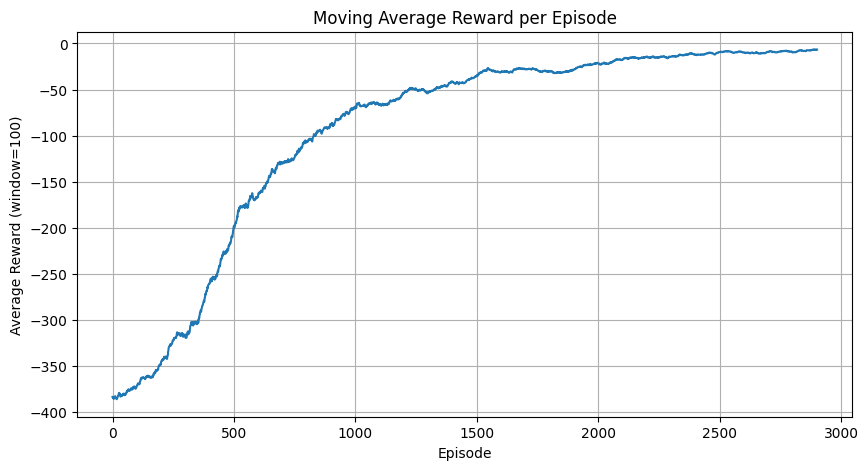

Plot saved to: results/plots/moving_avg_reward.png


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os

window = 100

# Create folder if not exists
os.makedirs("results/plots", exist_ok=True)

# Compute moving average
moving_avg = np.convolve(
    episode_rewards,
    np.ones(window)/window,
    mode='valid'
)

plt.figure(figsize=(10,5))
plt.plot(moving_avg)
plt.xlabel("Episode")
plt.ylabel(f"Average Reward (window={window})")
plt.title("Moving Average Reward per Episode")
plt.grid(True)

# Save figure
save_path = "results/plots/moving_avg_reward.png"
plt.savefig(save_path, dpi=300)

plt.show()

print(f"Plot saved to: {save_path}")


In [36]:
import imageio
import os
import numpy as np
import gymnasium as gym

env = gym.make("Taxi-v3", render_mode="rgb_array")
os.makedirs("results/videos", exist_ok=True)

for episode in range(5):

    state, _ = env.reset()
    print("Episode", episode)

    done = False
    frames = []   # to save each rendered frame

    for step in range(max_steps):

        # Collect frame
        frame = env.render()
        frames.append(frame)

        # Greedy action from Q-table
        action = np.argmax(q_table[state, :])

        # Step in environment
        next_state, reward, terminated, truncated, info = env.step(action)
        state = next_state

        if terminated or truncated:
            # Final frame
            frames.append(env.render())
            print("Finish Episode", episode, "with reward", reward)
            break

    # ---- SAVE GIF AFTER EPISODE ----
    gif_path = f"results/videos/taxi_episode_{episode}.gif"
    imageio.mimsave(gif_path, frames, fps=4)
    print("Saved GIF:", gif_path)

env.close()


Episode 0
Finish Episode 0 with reward 20
Saved GIF: results/videos/taxi_episode_0.gif
Episode 1
Finish Episode 1 with reward 20
Saved GIF: results/videos/taxi_episode_1.gif
Episode 2
Finish Episode 2 with reward 20
Saved GIF: results/videos/taxi_episode_2.gif
Episode 3
Finish Episode 3 with reward 20
Saved GIF: results/videos/taxi_episode_3.gif
Episode 4
Finish Episode 4 with reward 20
Saved GIF: results/videos/taxi_episode_4.gif
